In [2]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats
from sklearn.impute import SimpleImputer

from analysis_publication import *
from venn import pseudovenn, generate_petal_labels, draw_venn, generate_colors, draw_pseudovenn6

In [26]:
df = pd.read_csv('r values RRM2B-genes-selected.csv', index_col=1)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,CAT,PRDX1,PRDX6,GPX2,GSR,SLC6A9,TXN,SRXN1,G6PD,IDH1,...,UGT1A6,GSTA1,GSTA2,GSTA3,GSTA4,GSTA5,GSTM1,GSTM2,GSTM3,GSTP1
database,,,,,,,,,,,,,,,,,,,,,
HNSC,0.391256,-0.311509,-0.134014,-0.134038,0.003343,-0.126047,-0.275913,-0.039903,-0.177093,0.085628,...,-0.079723,-0.061340,-0.020766,-0.153676,-0.010479,0.058889,-0.005463,-0.009909,-0.046569,-0.378500
SARC,0.197568,-0.386911,0.014841,-0.103404,0.291176,-0.135855,-0.360189,0.075322,-0.300388,-0.034340,...,-0.057400,0.081233,0.105820,-0.013131,0.047593,0.064500,-0.005841,-0.094993,-0.008104,-0.263608
LUSC,0.471510,-0.154135,-0.129777,-0.300389,-0.101062,-0.160653,-0.268489,-0.179767,-0.263159,-0.059638,...,-0.233322,-0.074428,0.105439,0.211510,-0.092441,0.028477,-0.033979,-0.168894,-0.078712,-0.260598
UCS,0.235544,-0.316344,-0.085087,-0.221782,0.353536,0.060965,-0.106466,0.227168,-0.262871,0.187427,...,-0.277803,-0.194594,-0.150420,0.228928,0.060239,0.167249,0.026517,-0.205805,-0.341508,-0.507999
STAD,-0.014910,-0.157731,-0.023954,-0.187101,-0.022962,-0.100406,-0.118197,-0.080659,-0.225033,-0.045533,...,-0.204516,-0.320655,-0.298690,-0.061971,-0.209151,0.054085,-0.005442,-0.019267,-0.147740,-0.313067
LAML,0.069813,0.074416,-0.137958,0.156891,0.242907,-0.236188,-0.129230,0.008820,-0.306890,0.252293,...,-0.103376,-0.218808,-0.032589,-0.385910,NaN,NaN,NaN,NaN,NaN,NaN
PRAD,0.088457,-0.133702,0.028324,-0.188868,0.236720,-0.093836,-0.113865,0.310565,-0.247751,0.060410,...,-0.202029,-0.128693,-0.063952,-0.091603,-0.057096,0.025672,-0.021033,-0.287502,-0.182059,-0.296309
PAAD,0.151466,-0.349682,-0.412925,-0.186879,0.268968,-0.129570,-0.461774,0.121256,-0.420032,-0.057299,...,-0.342806,-0.167685,-0.017508,0.019906,0.301659,-0.016688,-0.030182,0.039233,-0.082475,-0.544512
BRCA,0.026877,0.032854,-0.145203,0.038515,0.254302,-0.068140,-0.185258,0.303215,-0.066740,-0.007452,...,-0.068464,-0.195192,-0.092369,0.188451,0.097607,-0.126845,-0.003972,-0.064224,0.073191,-0.484063


In [40]:
# process the dataframe df to extract out sets where the r values are less than -0.1

dataset_dict = {}
data_key = ['HNSC', 'SARC', 'LUSC', 'UCS', 'STAD','LAML']
for r in data_key:
    print(r)
    row_data = df.loc[r]
    # print(row_data)
    d = set(df.loc[r,df.loc[r] < -0.1].index.to_list())
    dataset_dict[r] = d

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")

significance_filter = lambda value: value if int(value) > 0 else " "

petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}

HNSC
SARC
LUSC
UCS
STAD
LAML


In [41]:
petal_labels

{'000001': ' ',
 '000010': '3',
 '000011': ' ',
 '000100': ' ',
 '000101': ' ',
 '000110': ' ',
 '000111': ' ',
 '001000': '1',
 '001001': ' ',
 '001010': '1',
 '001011': ' ',
 '001100': '2',
 '001101': ' ',
 '001110': ' ',
 '001111': ' ',
 '010000': ' ',
 '010001': ' ',
 '010010': '1',
 '010011': ' ',
 '010100': ' ',
 '010101': ' ',
 '010110': ' ',
 '010111': ' ',
 '011000': '3',
 '011001': '1',
 '011010': ' ',
 '011011': ' ',
 '011100': ' ',
 '011101': ' ',
 '011110': ' ',
 '011111': ' ',
 '100000': '1',
 '100001': ' ',
 '100010': ' ',
 '100011': ' ',
 '100100': ' ',
 '100101': ' ',
 '100110': ' ',
 '100111': ' ',
 '101000': '2',
 '101001': '2',
 '101010': '3',
 '101011': ' ',
 '101100': ' ',
 '101101': ' ',
 '101110': '2',
 '101111': ' ',
 '110000': ' ',
 '110001': ' ',
 '110010': ' ',
 '110011': ' ',
 '110100': ' ',
 '110101': ' ',
 '110110': ' ',
 '110111': ' ',
 '111000': ' ',
 '111001': ' ',
 '111010': '1',
 '111011': '1',
 '111100': '1',
 '111101': ' ',
 '111110': '1',
 '111111

In [42]:
petal_labels['111111'] = 'G6PD \n PGD \n TXN'


In [43]:
# petal_labels['111110'] = 'G6PD'

<AxesSubplot:>

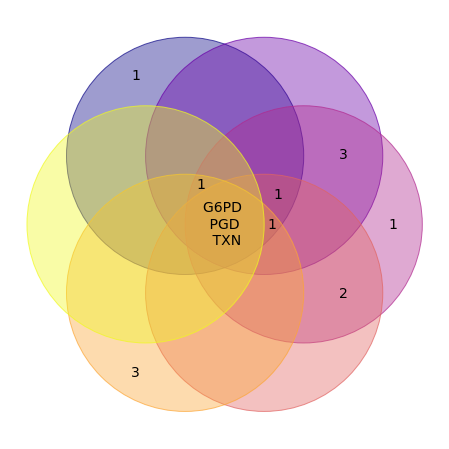

In [44]:
draw_pseudovenn6(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(cmap = 'plasma', n_colors=6), 
    figsize=(8, 8), fontsize=14, legend_loc=None, ax=None
)


<AxesSubplot:>

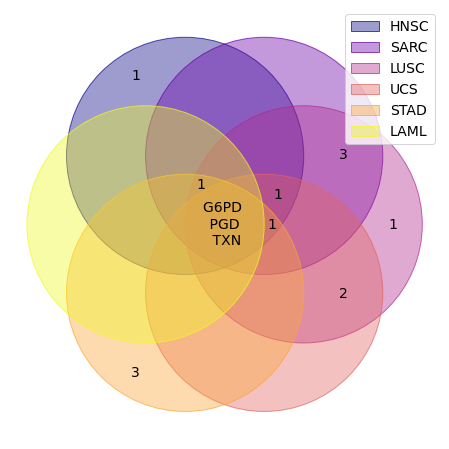

In [45]:
draw_pseudovenn6(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(cmap = 'plasma', n_colors=6), 
    figsize=(8, 8), fontsize=14, legend_loc='best', ax=None
)


In [34]:
df = pd.read_csv('r values p53sig-genes-selected.csv', index_col=1)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,CAT,PRDX1,PRDX6,GPX2,GSR,SLC6A9,TXN,SRXN1,G6PD,IDH1,...,UGT1A6,GSTA1,GSTA2,GSTA3,GSTA4,GSTA5,GSTM1,GSTM2,GSTM3,GSTP1
database,,,,,,,,,,,,,,,,,,,,,
HNSC,0.151593,-0.177860,0.026855,-0.252286,-0.015271,-0.131171,-0.078110,-0.231701,-0.269175,-0.018484,...,-0.079317,-0.011870,0.011839,-0.207585,-0.147735,0.110572,0.007699,-0.028567,-0.125189,-0.195813
SARC,0.219550,-0.166107,-0.166453,-0.039086,-0.109172,-0.260745,-0.184398,-0.024328,-0.144251,0.146371,...,-0.060752,-0.082953,-0.142363,-0.022241,0.157763,-0.025725,-0.021948,0.074491,0.068301,0.091614
LUSC,0.350507,-0.275603,-0.222568,-0.263369,-0.213851,-0.104361,-0.303983,-0.302610,-0.329364,-0.204343,...,-0.194610,-0.052212,0.082640,0.212219,-0.112368,0.058229,-0.026467,-0.144302,-0.139773,-0.149008
UCS,0.064134,-0.129996,0.047398,-0.086994,0.285768,0.045845,0.002706,0.130927,-0.232214,0.008890,...,-0.165984,0.044676,0.019489,0.504437,0.171542,0.462832,0.013717,-0.085347,-0.078140,-0.310026
STAD,0.116809,-0.017483,-0.023869,0.019631,0.189559,-0.116200,-0.016873,-0.051085,-0.191054,-0.004478,...,-0.046370,-0.115298,-0.140539,0.009003,-0.299715,0.006734,-0.052945,-0.126824,-0.130761,-0.184018
LAML,0.120974,0.111970,-0.140512,-0.178661,0.123358,-0.145554,0.025389,0.077733,0.218393,0.257646,...,-0.006494,-0.046178,0.016880,0.117158,NaN,NaN,NaN,NaN,NaN,NaN
PRAD,0.178533,0.076602,0.004412,0.259830,0.157627,0.093062,-0.138395,-0.115536,-0.032691,0.064467,...,0.110853,0.238656,0.187406,0.150779,0.170146,0.110904,-0.008743,0.185939,0.233506,0.298801
PAAD,0.099999,-0.009746,0.190592,0.086827,-0.013014,-0.111700,-0.073527,-0.065999,-0.029483,-0.060264,...,0.012112,0.039087,0.083374,0.104725,0.046838,-0.104640,-0.050541,-0.033987,-0.002796,0.049305
BRCA,0.104206,-0.196140,-0.209252,0.147455,0.044979,-0.173900,-0.232881,-0.018728,-0.112733,-0.099164,...,-0.045054,-0.081523,-0.200877,0.128098,-0.096819,-0.201630,0.120273,0.235847,0.189480,-0.190982


In [50]:
# process the dataframe df to extract out sets where the r values are less than -0.1

dataset_dict = {}
data_key = ['HNSC', 'SARC', 'LUSC', 'UCS', 'STAD', 'LAML']
for r in data_key:
    print(r)
    row_data = df.loc[r]
    # print(row_data)
    d = set(df.loc[r,df.loc[r] < -0.1].index.to_list())
    dataset_dict[r] = d

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")

significance_filter = lambda value: value if int(value) > 0 else " "

petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}

HNSC
SARC
LUSC
UCS
STAD
LAML


In [52]:
petal_labels['111110'] = 'G6PD'


<AxesSubplot:>

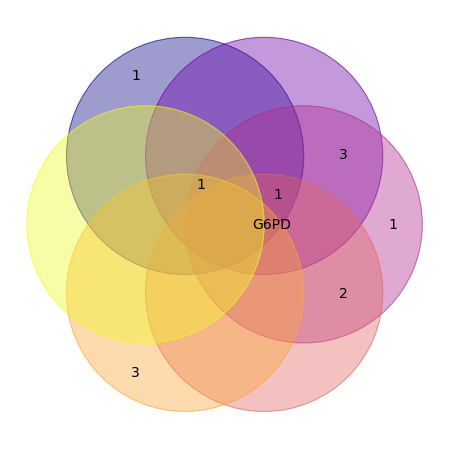

In [53]:
draw_pseudovenn6(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(cmap = 'plasma', n_colors=6), 
    figsize=(8, 8), fontsize=14, legend_loc=None, ax=None
)


<AxesSubplot:>

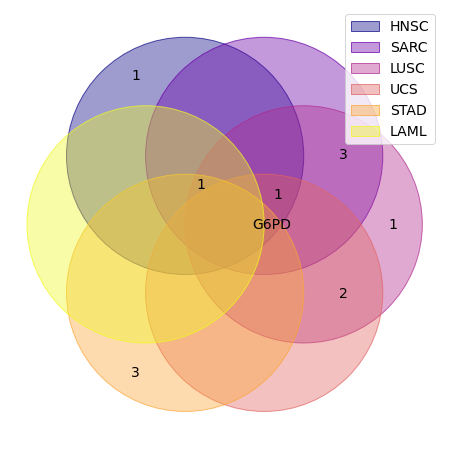

In [49]:
draw_pseudovenn6(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(cmap = 'plasma', n_colors=6), 
    figsize=(8, 8), fontsize=14, legend_loc='best', ax=None
)
